<a href="https://colab.research.google.com/github/srdebayan/bank-marketing/blob/main/ML_miniProj1_deb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The workbook is aimed to analyze, process and make prediction from a bank phone marketing dataset. The work uses sequential neural network to predict which calls will be converted into positive sales.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import itertools

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import random as rn

import os
#our dataset file is stored in this location
url = 'https://raw.githubusercontent.com/srdebayan/bank-marketing/main/bank-additional-full.csv'
df1 = pd.read_csv(url,sep = ';')
# Dataset is now stored in a Pandas Dataframe

Checking the dataset by loading it

In [ ]:
df1.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:

#count the number of rows for each type
df1.groupby('y').size()



y
no     36548
yes     4640
dtype: int64

In [ ]:
#OUTPUT_LABEL is going to represent 0 for the negative and 1 for the positive based on the data set.
df1['OUTPUT_LABEL'] = (df1.y == 'yes').astype('int')

Next we are calculating how many postive classes are there in the data set

In [ ]:
#The prevalence of the positive class is calculated here...

def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))
print('prevalence of the positive class: %.3f'%calc_prevalence(df1['OUTPUT_LABEL'].values))
#prevalence of the positive class: 0.113
#The prevlence of the positive class is 11.3% which means that the proportion of people who agreed to a term deposit (positive class) compared to the people who did not is 11.3%.

prevalence of the positive class: 0.113


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

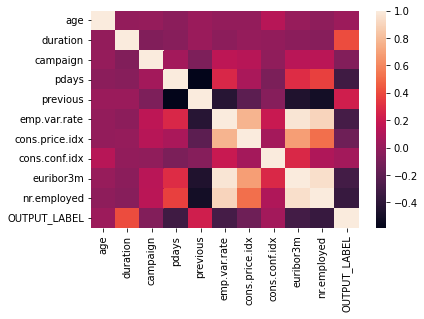

In [ ]:
#making the correalation heatmap to see how are the features connected to each other
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#taking out the numerical coloumns, the coloumns having specific numerical values 
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']
df1[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857


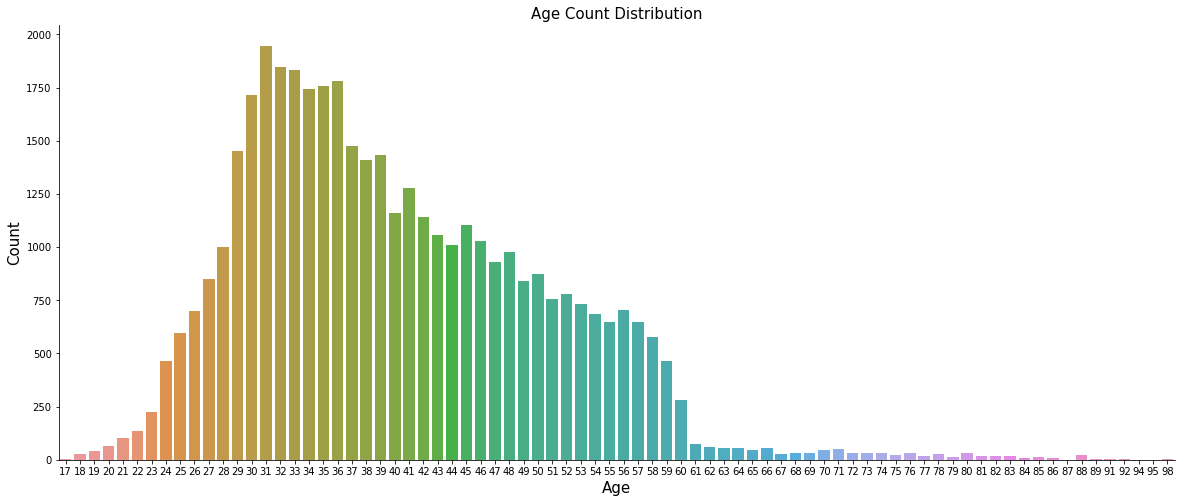

In [ ]:
# checking for the age distribution in the data set
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df1[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [ ]:
#checking if there is any null values
df1[cols_num].isnull().sum()

campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
age               0
euribor3m         0
dtype: int64

In [ ]:
#the columns with categorical values
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'month',
       'day_of_week', 'poutcome']
df1[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [ ]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'month',
       'day_of_week', 'poutcome',]
df1[cols_cat]
cols_new_cat=pd.get_dummies(df1[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


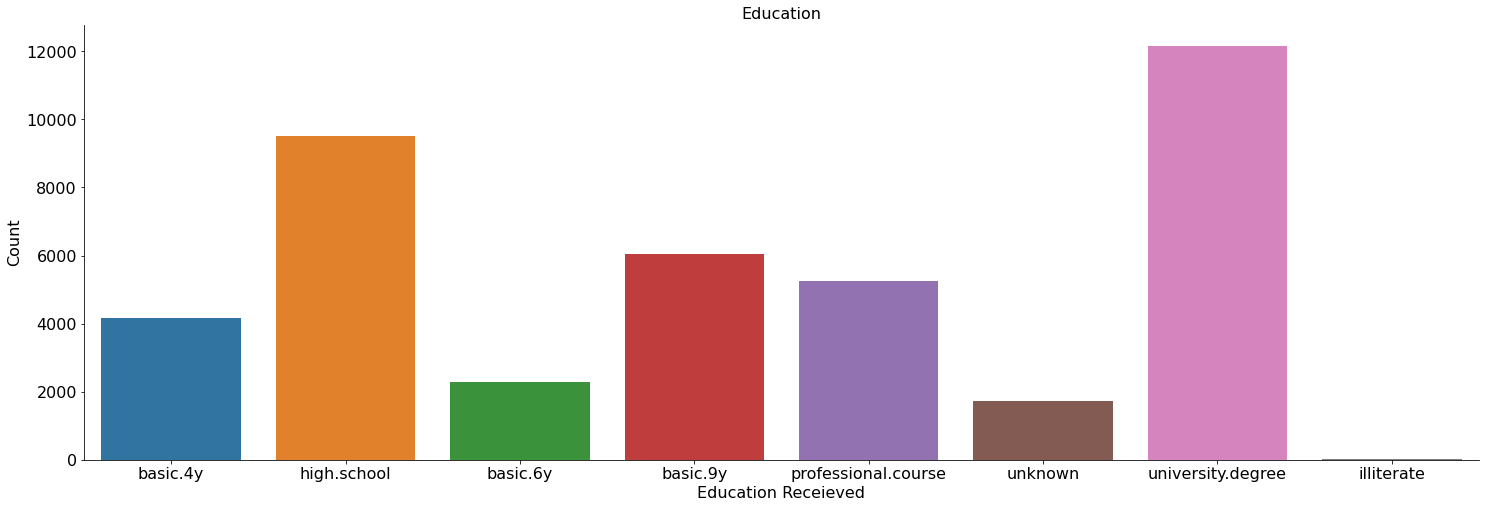

In [ ]:

import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df1[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

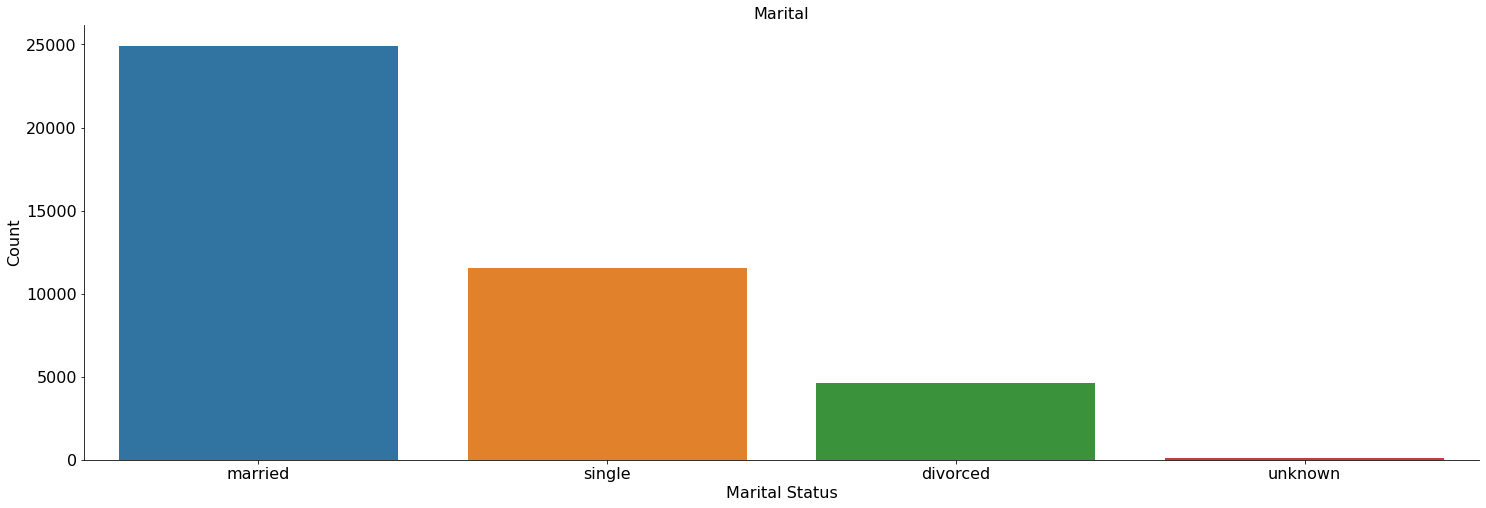

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df1[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

After doing the one hot encoding we are now seeing the data, the columns have been now based on the categories as-well

In [ ]:
df1 = pd.concat([df1,cols_new_cat], axis = 1)
cols_all_cat=list(cols_new_cat.columns)
df1[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 60
Numerical Features: 9
Categorical Features: 51


In [ ]:
df1[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)


campaign                         0
pdays                            0
education_unknown                0
default_no                       0
default_unknown                  0
default_yes                      0
housing_no                       0
housing_unknown                  0
housing_yes                      0
loan_no                          0
loan_unknown                     0
loan_yes                         0
month_apr                        0
month_aug                        0
month_dec                        0
month_jul                        0
month_jun                        0
month_mar                        0
month_may                        0
month_nov                        0
month_oct                        0
month_sep                        0
day_of_week_fri                  0
day_of_week_mon                  0
day_of_week_thu                  0
day_of_week_tue                  0
day_of_week_wed                  0
poutcome_failure                 0
poutcome_nonexistent

In [ ]:
cols_input = cols_num + cols_all_cat
df_data = df1[cols_input + ['OUTPUT_LABEL']]
cols_input


['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 '

In [ ]:
size= len(cols_input)
size 

60

In [ ]:
df_data.head(6)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,0,...,0,0,1,0,0,0,0,1,0,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,0,...,0,0,1,0,0,0,0,1,0,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,1,...,0,0,1,0,0,0,0,1,0,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
5,1,999,0,1.1,93.994,-36.4,5191.0,45,4.857,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
#shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)
df_valid_test=df_data.sample(frac=0.10,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.100


In [ ]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)
#use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 2060):0.116
Valid prevalence(n = 2059):0.119
Train all prevalence(n = 37069):0.112


In [ ]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 8310):0.500


In [ ]:
# split the validation into positive and negative
rows_pos = df_valid.OUTPUT_LABEL == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Valid balanced prevalence(n = 492):0.500


In [ ]:
# split the test into positive and negative
rows_pos = df_test.OUTPUT_LABEL == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Test balanced prevalence(n = 478):0.500


In [ ]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [ ]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [ ]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,campaign,2.561116
2,pdays,962.434730
3,previous,0.173029
4,emp.var.rate,0.081516


In [ ]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [ ]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (37069, 60)
Training shapes: (8310, 60) (8310,)
Validation shapes: (492, 60) (492,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)
scalerfile = 'scaler.sav'



In [ ]:
pickle.dump(scaler, open(scalerfile, 'wb'))

In [ ]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [ ]:
X_train_tf.size

498600

Neural network

In [ ]:
print(X_train_tf.shape)
print(X_valid_tf.shape)
print(y_train.shape)
print(y_valid.shape)

(8310, 60)
(492, 60)
(8310,)
(492,)


In [ ]:
model = Sequential()

model.add(Dense(16, input_dim=60, activation='relu', name= 'input'))
model.add(Dense(32, activation='relu', name= 'hidden_1'))
model.add(Dense(64, activation='relu', name= 'hidden_2'))
#model.add(Dense(128, activation='relu', name= 'hidden_3'))
#model.add(Dense(256,  activation='relu', name= 'hidden_4'))
#model.add(Dense(512, activation='relu', name= 'hidden_5'))
#model.add(Dense(1028, activation='relu', name= 'hidden_6'))
#model.add(Dense(2056, activation='relu', name= 'hidden_7'))
model.add(Dense(1, input_dim=62, activation='sigmoid', name= 'output'))

In [ ]:
opt = Adam(learning_rate= 0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                976       
                                                                 
 hidden_1 (Dense)            (None, 32)                544       
                                                                 
 hidden_2 (Dense)            (None, 64)                2112      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 3,697
Trainable params: 3,697
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
training_results = model.fit(X_train_tf, y_train, verbose=1, batch_size=175, epochs=100 , validation_data= (X_valid_tf,y_valid)) 

Epoch 1/100
48/48 [==============================] - 1s 6ms/step - loss: 0.6073 - accuracy: 0.6787 - val_loss: 0.5623 - val_accuracy: 0.7093
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7241 - val_loss: 0.5417 - val_accuracy: 0.7439
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5459 - accuracy: 0.7384 - val_loss: 0.5344 - val_accuracy: 0.7541
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.5378 - accuracy: 0.7419 - val_loss: 0.5295 - val_accuracy: 0.7439
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7446 - val_loss: 0.5294 - val_accuracy: 0.7419
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7477 - val_loss: 0.5292 - val_accuracy: 0.7378
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.7501 - val_loss: 0.5244 - val_accuracy: 0.7398
Epoch 8/100
4

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


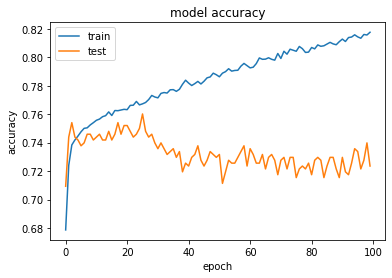

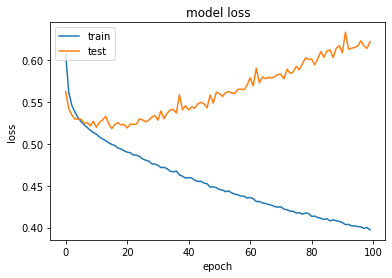

In [ ]:
# list all data in history
print(training_results.history.keys())
#summarize history for accuracy
#plt.figure(figsize=(20,20))
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_results.history['loss'])
plt.plot(training_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [ ]:
df_test= pd.read_csv('df_test.csv')
df_test = fill_my_missing(df_test, df_mean_in, cols_input)
X_test = df_test[cols_input].values
y_test = df_test['OUTPUT_LABEL'].values
X_test_tf = scaler.transform(X_test)


In [ ]:
results = model.evaluate(X_test_tf, y_test)
results

15/15 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6841


[0.6804142594337463, 0.6841003894805908]

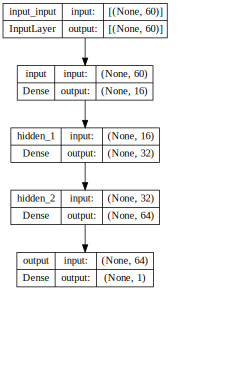

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# Visualize network architecture
SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))